# Data Science From Scratch Notes

## Chapter 8: Gradient Descent

Gradient descent is an optimization technique.

## The Idea Behind Gradient Descent

Let's have some function that takes an input vector of real numbers and outputs a single real number:

In [1]:
from scratch.linear_algebra import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

The *gradient* (the vector of partial derivatives) gives the input direction in which the function most quickly increases. Therefore, one approach to maximizing a function is to pick a random starting point, compute the gradient, and take incremental steps in the direction of the gradient. With each step, we compute the gradient again.

Note that this procedure works well for function that have a unique global minimum/maximum. If there are local minima/maxima, we could get different answers depending on our starting point.

## Estimating the Gradient

The derivative is defined as the limit of the difference quotients:

In [2]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

as h approaches zero. For many functions it's easy to exactly calculate derivatives. For example, the `square` function:

In [3]:
def square(x: float) -> float:
    return x * x

has the derivative:

In [4]:
def derivative(x: float) -> float:
    return 2 * x

We can estimate derivatives by evaluating the difference quotient for a very small `e`:

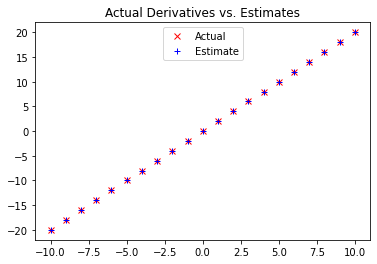

In [8]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual') # red x
plt.plot(xs, estimates, 'b+', label='Estimate') # blue +
plt.legend(loc=9)
plt.show()

When a function has many variables, we calculate its *i*th partial derivative by treating it as a function of just its *i*th variable, holding the other variables fixed:

In [9]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial different quotient of f at v"""
    w = [v_j + (h if j == i else 0) # add h to just the ith element of v
         for j, v_j in enumerate(v)]
    
    return(f(w) - f(v)) / h

Then, we can estimate the gradient the same way:

In [11]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001) -> float:
    return [partial_difference_quotient(f, v, i, h)
            for i in enumerate(v)]

## Using the Gradient

Let's use gradients to find the minimum among all three-dimensional vectors. We pick a random starting point, then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small:

In [12]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute the gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative gradient step
    print(epoch, v)
    
assert distance(v, [0, 0, 0]) < 0.001 # v should be close to 0

0 [0.546719021606845, -8.16949331309596, 3.371241465100432]
1 [0.5357846411747081, -8.006103446834041, 3.303816635798423]
2 [0.525068948351214, -7.845981377897361, 3.2377403030824548]
3 [0.5145675693841897, -7.689061750339413, 3.1729854970208056]
4 [0.5042762179965059, -7.535280515332625, 3.1095257870803894]
5 [0.4941906936365758, -7.384574905025972, 3.0473352713387816]
6 [0.4843068797638443, -7.236883406925453, 2.986388565912006]
7 [0.4746207421685674, -7.092145738786944, 2.926660794593766]
8 [0.4651283273251961, -6.950302824011205, 2.8681275787018907]
9 [0.4558257607786922, -6.811296767530981, 2.810765027127853]
10 [0.44670924556311836, -6.675070832180361, 2.754549726585296]
11 [0.437775060651856, -6.541569415536753, 2.69945873205359]
12 [0.42901955943881886, -6.410738027226018, 2.645469557412518]
13 [0.42043916825004246, -6.282523266681498, 2.592560166264268]
14 [0.4120303848850416, -6.156872801347868, 2.5407089629389827]
15 [0.40378977718734077, -6.033735345320911, 2.48989478368020

671 [7.086976194019688e-07, -1.0589901272677649e-05, 4.37005245166683e-06]
672 [6.945236670139294e-07, -1.0378103247224096e-05, 4.282651402633494e-06]
673 [6.806331936736508e-07, -1.0170541182279614e-05, 4.196998374580824e-06]
674 [6.670205298001778e-07, -9.967130358634021e-06, 4.113058407089208e-06]
675 [6.536801192041742e-07, -9.76778775146134e-06, 4.030797238947424e-06]
676 [6.406065168200907e-07, -9.572431996432113e-06, 3.950181294168476e-06]
677 [6.277943864836889e-07, -9.380983356503471e-06, 3.871177668285106e-06]
678 [6.152384987540151e-07, -9.193363689373402e-06, 3.793754114919404e-06]
679 [6.029337287789348e-07, -9.009496415585934e-06, 3.717879032621016e-06]
680 [5.908750542033562e-07, -8.829306487274216e-06, 3.6435214519685956e-06]
681 [5.79057553119289e-07, -8.652720357528732e-06, 3.570651022929224e-06]
682 [5.674764020569032e-07, -8.479665950378157e-06, 3.4992380024706393e-06]
683 [5.561268740157651e-07, -8.310072631370594e-06, 3.4292532424212265e-06]
684 [5.450043365354498

## Choosing the Right Step Size

Options include:

  * Using a fixed step size
  * Gradually shrinking the step size over time
  * At each step, choosing the step size that minimizes the value of the objective function
  
In general, need to experiment with step size.

## Using Gradient Descent to Fit Models

Gradient descent is used to fit parameterized models to data. We need a dataset, a hypothesized model, and a *loss* function to quantify how well the model fits the data.

In other words, we will use gradient descent to find the model parameters that minimize the loss:

In [13]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In this case, we know the parameters of the linear relationship between x and y. We'll use gradient descent to find the slope and intercept that minimize the average squared error.

Let's first create a function that determines the gradient based on the error from a single data point:

In [14]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept # The prediction of the model
    error = (predicted - y)
    squared_error = error ** 2 # We'll minimize the squared error
    grad = [2 * error * x, 2 * error] # using its gradient
    return grad

Conceptually, the gradient means that for some `x`, our prediction is too large. In that case the `error` is positive. The second gradient term, `2 * error`, is positive, which reflects the fact that small increases in the intercept will make the prediction even larger, which will cause the squared error to get even bigger. The *mean squred error* is just the mean of the individual gradients

Steps:
  1. Start with a random value for `theta`
  2. Compute the mean of the gradients
  3. Adjust theta in that direction
  4. Repeat

In [15]:
from scratch.linear_algebra import vector_mean

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [32.919619004309055, -0.7648744669989055]
1 [11.376849249658864, -0.7404250990605986]
2 [25.745901125378474, -0.7375673996128186]
3 [16.16174638197294, -0.7203463636882145]
4 [22.554394816860363, -0.712743924578865]
5 [18.29050591322956, -0.698764041912847]
6 [21.13453379183397, -0.6890760079157918]
7 [19.237576884838823, -0.6765633221081263]
8 [20.502859654490397, -0.6659726185790713]
9 [19.658926637836327, -0.6541378136874227]
10 [20.221841794749484, -0.6431706114222115]
11 [19.846388352290674, -0.6316624284046176]
12 [20.096827306593717, -0.6205527151955177]
13 [19.929795633786796, -0.6092147824585329]
14 [20.04121709748175, -0.598066557259829]
15 [19.966910129422413, -0.5868292070478277]
16 [20.016484114468202, -0.5756886385043096]
17 [19.983429407011204, -0.5645207771128329]
18 [20.005488064746412, -0.553408306151596]
19 [19.990786052507993, -0.5422960014745464]
20 [20.000603406975696, -0.5312206234190893]
21 [19.99406630692379, -0.5201575787652754]
22 [19.998437615703065, -0.50

649 [19.999056631724855, 3.4292912552987813]
650 [19.99905851789482, 3.4324317294199087]
651 [19.999060400293576, 3.4355659244789636]
652 [19.999062278928662, 3.438693853030299]
653 [19.999064153807613, 3.441815527603167]
654 [19.999066024937925, 3.444930960701768]
655 [19.999067892327105, 3.4480401648053025]
656 [19.999069755982628, 3.451143152368019]
657 [19.999071615911955, 3.454239935819266]
658 [19.999073472122546, 3.4573305275635393]
659 [19.999075324621824, 3.460414939980535]
660 [19.999077173417223, 3.463493185425196]
661 [19.999079018516138, 3.4665652762277626]
662 [19.999080859925964, 3.4696312246938232]
663 [19.999082697654075, 3.4726910431043616]
664 [19.999084531707837, 3.475744743715807]
665 [19.999086362094587, 3.478792338760083]
666 [19.99908818882167, 3.4818338404446574]
667 [19.999090011896392, 3.4848692609525895]
668 [19.99909183132606, 3.4878986124425806]
669 [19.999093647117963, 3.4909219070490214]
670 [19.999095459279367, 3.4939391568820413]
671 [19.99909726781754

1149 [19.999653197203486, 4.422573135514033]
1150 [19.99965389060079, 4.423727642440208]
1151 [19.999654582611715, 4.424879841045929]
1152 [19.999655273239032, 4.426029735946448]
1153 [19.999655962485512, 4.427177331747795]
1154 [19.99965665035391, 4.428322633046785]
1155 [19.99965733684699, 4.429465644431046]
1156 [19.999658021967488, 4.430606370479031]
1157 [19.999658705718165, 4.43174481576004]
1158 [19.999659388101744, 4.432880984834238]
1159 [19.99966006912097, 4.434014882252671]
1160 [19.999660748778567, 4.435146512557287]
1161 [19.999661427077253, 4.4362758802809505]
1162 [19.99966210401975, 4.437402989947466]
1163 [19.999662779608773, 4.43852784607159]
1164 [19.99966345384702, 4.4396504531590555]
1165 [19.999664126737198, 4.440770815706585]
1166 [19.999664798281994, 4.441888938201909]
1167 [19.99966546848411, 4.443004825123787]
1168 [19.99966613734622, 4.4441184809420236]
1169 [19.999666804871012, 4.445229910117486]
1170 [19.99966747106115, 4.446339117102122]
1171 [19.999668135

1649 [19.999872507712162, 4.787725264180964]
1650 [19.999872762620168, 4.788149686160314]
1651 [19.99987301701851, 4.788573259550613]
1652 [19.999873270908207, 4.788995986048531]
1653 [19.999873524290273, 4.789417867347342]
1654 [19.999873777165735, 4.789838905136937]
1655 [19.99987402953559, 4.790259101103829]
1656 [19.999874281400864, 4.790678456931157]
1657 [19.999874532762554, 4.7910969742986955]
1658 [19.999874783621674, 4.79151465488286]
1659 [19.999875033979226, 4.791931500356716]
1660 [19.999875283836214, 4.7923475123899815]
1661 [19.999875533193634, 4.792762692649037]
1662 [19.999875782052495, 4.793177042796933]
1663 [19.999876030413784, 4.793590564493392]
1664 [19.9998762782785, 4.7940032593948185]
1665 [19.999876525647636, 4.794415129154308]
1666 [19.99987677252218, 4.794826175421647]
1667 [19.999877018903128, 4.795236399843326]
1668 [19.999877264791458, 4.795645804062542]
1669 [19.99987751018816, 4.796054389719209]
1670 [19.999877755094218, 4.796462158449959]
1671 [19.99987

2148 [19.999953037150988, 4.921806828184773]
2149 [19.999953131048475, 4.921963167565555]
2150 [19.999953224758233, 4.922119194361472]
2151 [19.99995331828062, 4.922274909197507]
2152 [19.999953411616023, 4.922430312697393]
2153 [19.99995350476481, 4.922585405483614]
2154 [19.999953597727355, 4.9227401881774115]
2155 [19.999953690504032, 4.922894661398784]
2156 [19.999953783095208, 4.92304882576649]
2157 [19.999953875501262, 4.9232026818980525]
2158 [19.999953967722558, 4.923356230409758]
2159 [19.999954059759464, 4.923509471916661]
2160 [19.999954151612354, 4.923662407032587]
2161 [19.999954243281593, 4.923815036370135]
2162 [19.999954334767548, 4.923967360540676]
2163 [19.999954426070587, 4.9241193801543615]
2164 [19.99995451719107, 4.9242710958201235]
2165 [19.999954608129375, 4.924422508145674]
2166 [19.99995469888585, 4.9245736177375115]
2167 [19.999954789460876, 4.924724425200922]
2168 [19.999954879854798, 4.924874931139981]
2169 [19.99995497006799, 4.925025136157556]
2170 [19.99

2648 [19.999982735430265, 4.971254481024697]
2649 [19.99998276994904, 4.971311954798077]
2650 [19.99998280439879, 4.97136931365843]
2651 [19.999982838779665, 4.971426557835512]
2652 [19.9999828730918, 4.971483687558621]
2653 [19.99998290733533, 4.971540703056595]
2654 [19.999982941510392, 4.971597604557817]
2655 [19.999982975617126, 4.971654392290212]
2656 [19.99998300965567, 4.971711066481249]
2657 [19.999983043626152, 4.971767627357942]
2658 [19.999983077528714, 4.971824075146853]
2659 [19.999983111363495, 4.971880410074088]
2660 [19.999983145130624, 4.971936632365304]
2661 [19.999983178830238, 4.971992742245703]
2662 [19.999983212462478, 4.972048739940043]
2663 [19.99998324602747, 4.972104625672625]
2664 [19.999983279525352, 4.972160399667307]
2665 [19.999983312956257, 4.972216062147497]
2666 [19.999983346320324, 4.972271613336159]
2667 [19.99998337961768, 4.972327053455807]
2668 [19.99998341284846, 4.9723823827285125]
2669 [19.999983446012806, 4.972437601375904]
2670 [19.9999834791

3130 [19.999993420352375, 4.989044882753578]
3131 [19.99999343350772, 4.989066786408423]
3132 [19.99999344663676, 4.9890886462691135]
3133 [19.99999345973955, 4.989110462423212]
3134 [19.999993472816143, 4.989132234958105]
3135 [19.99999348586659, 4.989153963961005]
3136 [19.999993498890944, 4.98917564951895]
3137 [19.999993511889258, 4.989197291718803]
3138 [19.999993524861583, 4.989218890647255]
3139 [19.99999353780797, 4.989240446390822]
3140 [19.999993550728476, 4.989261959035848]
3141 [19.999993563623143, 4.989283428668505]
3142 [19.99999357649203, 4.989304855374791]
3143 [19.99999358933519, 4.989326239240533]
3144 [19.999993602152667, 4.989347580351388]
3145 [19.999993614944522, 4.989368878792837]
3146 [19.999993627710797, 4.989390134650196]
3147 [19.99999364045155, 4.989411348008606]
3148 [19.999993653166825, 4.98943251895304]
3149 [19.99999366585668, 4.989453647568301]
3150 [19.99999367852116, 4.989474733939021]
3151 [19.999993691160324, 4.9894957781496645]
3152 [19.99999370377

3582 [19.99999733728042, 4.995566570297556]
3583 [19.999997342604257, 4.995575434494241]
3584 [19.999997347917454, 4.995584280967857]
3585 [19.999997353220028, 4.995593109753838]
3586 [19.999997358511994, 4.995601920887551]
3587 [19.999997363793387, 4.995610714404288]
3588 [19.999997369064214, 4.995619490339273]
3589 [19.999997374324508, 4.995628248727658]
3590 [19.999997379574282, 4.995636989604527]
3591 [19.999997384813557, 4.995645713004893]
3592 [19.999997390042363, 4.995654418963697]
3593 [19.999997395260706, 4.995663107515812]
3594 [19.999997400468626, 4.995671778696041]
3595 [19.99999740566612, 4.9956804325391175]
3596 [19.999997410853236, 4.995689069079705]
3597 [19.99999741602997, 4.995697688352399]
3598 [19.999997421196362, 4.995706290391724]
3599 [19.99999742635242, 4.995714875232137]
3600 [19.99999743149817, 4.995723442908025]
3601 [19.999997436633628, 4.995731993453707]
3602 [19.999997441758826, 4.995740526903433]
3603 [19.999997446873767, 4.995749043291386]
3604 [19.99999

4098 [19.99999905197542, 4.99842153850325]
4099 [19.999999053870898, 4.998424694478219]
4100 [19.99999905576259, 4.998427844143134]
4101 [19.999999057650495, 4.99843098751061]
4102 [19.99999905953463, 4.998434124593239]
4103 [19.999999061414993, 4.998437255403587]
4104 [19.999999063291604, 4.998440379954195]
4105 [19.999999065164456, 4.998443498257578]
4106 [19.999999067033567, 4.998446610326227]
4107 [19.999999068898937, 4.998449716172608]
4108 [19.99999907076058, 4.998452815809162]
4109 [19.9999990726185, 4.998455909248304]
4110 [19.999999074472708, 4.998458996502426]
4111 [19.999999076323206, 4.998462077583894]
4112 [19.999999078170006, 4.998465152505049]
4113 [19.99999908001311, 4.998468221278209]
4114 [19.999999081852533, 4.9984712839156655]
4115 [19.999999083688277, 4.998474340429687]
4116 [19.99999908552035, 4.998477390832516]
4117 [19.99999908734876, 4.998480435136371]
4118 [19.999999089173514, 4.998483473353447]
4119 [19.99999909099462, 4.998486505495914]
4120 [19.999999092812

4581 [19.999999639423617, 4.9993996401072165]
4582 [19.999999640144555, 4.999400840466426]
4583 [19.999999640864047, 4.999402038425638]
4584 [19.999999641582107, 4.999403233989651]
4585 [19.999999642298725, 4.999404427163253]
4586 [19.999999643013915, 4.999405617951226]
4587 [19.99999964372767, 4.999406806358337]
4588 [19.999999644440003, 4.999407992389348]
4589 [19.999999645150908, 4.999409176049009]
4590 [19.999999645860395, 4.999410357342062]
4591 [19.999999646568458, 4.9994115362732385]
4592 [19.99999964727511, 4.999412712847261]
4593 [19.99999964798035, 4.999413887068841]
4594 [19.999999648684177, 4.999415058942684]
4595 [19.999999649386595, 4.999416228473482]
4596 [19.999999650087613, 4.999417395665922]
4597 [19.999999650787228, 4.999418560524678]
4598 [19.999999651485442, 4.999419723054416]
4599 [19.999999652182264, 4.999420883259792]
4600 [19.99999965287769, 4.999422041145455]
4601 [19.999999653571727, 4.999423196716042]
4602 [19.999999654264375, 4.999424349976182]
4603 [19.999

## Minibatch and Stochastic Gradient Descent

A disadvantage of the preceding approach is that we had to evaluate the gradients on the entire dataset before taking a gradient step and update the parameters.

When we have large datasets and expensive gradietn computations, we want to take gradient steps more often. We can do this using a technique called *minibatch gradient descent*, in which we compute the gradient based on a "minibatch" sampled from the larger dataset:

In [17]:
from typing import TypeVar, List, Iterator

T = TypeVar('T') # This allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: random.shuffle(batch_starts) # shuffle the batches
        
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

Now we can solve our problem again using minibatches:

In [24]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size = 20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.475631920048862, 1.0826490933661774]
1 [19.94316614794319, 1.2023554746595577]
2 [21.57955406192124, 1.3000803517439334]
3 [18.519429015299544, 1.3444741717197415]
4 [19.722650772280435, 1.5118106040940398]
5 [21.437337744028245, 1.5927902166628425]
6 [20.14740349442059, 1.6126410303681933]
7 [19.861735040298935, 1.765914358979814]
8 [19.508675892759356, 1.843006789342962]
9 [19.837053622979557, 1.7699748827471962]
10 [20.191537255109875, 1.7999156477582179]
11 [20.113847043959776, 1.9749630860274985]
12 [19.90848144399919, 2.0151093447197916]
13 [20.031044062887123, 2.0316176268830217]
14 [20.116080216274636, 2.0567509820435683]
15 [20.02134822582209, 2.0734573305141013]
16 [19.882891825800726, 2.1397345616142065]
17 [19.960473312661012, 2.1416940778680726]
18 [19.9995797368178, 2.1598796355577137]
19 [19.722526342953287, 2.1872717542376794]
20 [20.44070921497165, 2.1940327110119693]
21 [20.124599867189808, 2.467168348483451]
22 [20.010144345463548, 2.581998392041036]
23 [20.171

481 [20.000009757487327, 4.9988184336644705]
482 [20.00023763690709, 4.998830713844323]
483 [20.00010038256423, 4.998831631406702]
484 [20.000081526235057, 4.998838511300536]
485 [20.00002369084955, 4.998837546950186]
486 [19.9998293812104, 4.998853460588018]
487 [19.99994168155109, 4.998903255257749]
488 [19.999946945803224, 4.998953006200257]
489 [20.00001510160686, 4.998959929519999]
490 [20.00002694826628, 4.998967315488308]
491 [19.999959810125265, 4.998982933530636]
492 [19.99956389706779, 4.9990117743745985]
493 [19.999522374000584, 4.999054189667875]
494 [19.999835526904512, 4.999147524569215]
495 [19.999887129225947, 4.999151058167157]
496 [19.999909819856537, 4.999155516071574]
497 [20.000052075184758, 4.999159771759318]
498 [19.999969132742358, 4.999160367736474]
499 [19.999622220848483, 4.999184134512627]
500 [20.0000059200229, 4.999033952503163]
501 [19.999959678688374, 4.999077656334724]
502 [19.99990465463866, 4.999085141438854]
503 [20.000055272091476, 4.999090206226795

774 [20.00000037614189, 4.999973485466352]
775 [20.00000189817882, 4.999973567219907]
776 [20.00000015252471, 4.9999747890591255]
777 [20.000000391342116, 4.9999748786304075]
778 [20.000005077997397, 4.999975129136846]
779 [20.00000128735861, 4.999974364177299]
780 [20.000000976559008, 4.9999755990453565]
781 [19.999998929000043, 4.99997564270751]
782 [19.99999909433809, 4.999975769254125]
783 [20.000000604355392, 4.99997603514795]
784 [20.000000877561646, 4.999976939177973]
785 [20.000000877240616, 4.99997700535734]
786 [20.00000963742005, 4.999977644719618]
787 [20.000002040752904, 4.9999775597265055]
788 [19.999999897315295, 4.999977744450358]
789 [19.99999476840658, 4.999978020658212]
790 [20.000000207432034, 4.999978573180331]
791 [19.999999175163584, 4.999979503192345]
792 [19.999990621144722, 4.999980092370148]
793 [20.000000276793536, 4.999979729826471]
794 [19.99999933833625, 4.999979951863546]
795 [19.999998774403405, 4.999980002410453]
796 [19.999999235284275, 4.999980070570

Another variation is *stochastic gradient descent*, in which we take gradient steps based on one training example at a time:

In [25]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.091834063292627, 0.42923017391868795]
1 [20.087893376872316, 0.6253334117610931]
2 [20.08412241919539, 0.8130230698057562]
3 [20.080513253953804, 0.9926601353169796]
4 [20.07705892917788, 1.1645900947310832]
5 [20.07375280865736, 1.3291436118530204]
6 [20.07058854311634, 1.4866371639920608]
7 [20.06756002490985, 1.6373736501507845]
8 [20.0646614532115, 1.7816429739246158]
9 [20.06188723415987, 1.9197226010065078]
10 [20.059232041044865, 2.051878092545655]
11 [20.05669075789581, 2.1783636161164024]
12 [20.0542585053762, 2.299422434535482]
13 [20.05193062445754, 2.4152873742651217]
14 [20.04970260403426, 2.526181272307688]
15 [20.04757017133521, 2.6323174047191733]
16 [20.045529230726633, 2.733899897557474]
17 [20.043575865305527, 2.831124119383745]
18 [20.041706285669868, 2.924177056194772]
19 [20.039916945821837, 3.0132376719996046]
20 [20.03820434463261, 3.0984772522716177]
21 [20.0365652207898, 3.180059733234271]
22 [20.03499644334054, 3.258142018698516]
23 [20.03349498020913, 